In [1]:
from pylab import *
%run integradores.ipynb
%matplotlib inline

Tenemos la siguiente ecuación, que resolveremos para verificar el funcionamiento de los cuatro métodos programados en el noteboook _integradores_:

$$
 \ddot x  + 0.5\dot x + \sin x = e^{-t}\sin(3t)
$$

Reordenando y haciendo un cambio de variable, tenemos dos ecuaciones de primer orden:

$$\begin{array}\\ \dot x &=& y\\ \dot y &=& -0.5y - \sin x + e^{-t}\sin 3t \end{array}$$

De manera que la parcial y el Jacobiano son:
$$\begin{array}\\
\partial f/ \partial t &=& ( 0, [3\cos 3t-\sin 3t]e^{-t} ) \\
J(x,y) &=& \begin{pmatrix} 0 & 1 \\ -cos(x) & -0.5 \end{pmatrix}
\end{array}$$

In [2]:
inicial = array([0,1])
dominio = [0,50]

def prueba(x,t):
    y = x[1]
    y_dot = -0.5*y - sin(x[0]) + exp(-t)*sin(3*t)
    return array([y,y_dot])
def D_prueba(x,t):
    par = array([0,exp(-t)*(3*cos(3*t)-sin(3*t))])
    jac = array([ [0, 1], [-cos(x[0]), -0.5] ])
    return par,jac

In [3]:
integradores = ["Euler","Taylor, O2","Runge-Kutta, O1","Runge-Kutta, O2"]
pasos = [0.4,0.1,0.01]
soluciones = {h:[] for h in pasos}
# Calcular las soluciones, con cada integrador, para los distintos pasos
for h in soluciones.keys():
    soluciones[h].append(int_euler(prueba,inicial,dominio,h=h))
    soluciones[h].append(int_ty2(prueba,D_prueba,inicial,dominio,h=h))
    soluciones[h].append(int_rk2(prueba,inicial,dominio,h=h))
    soluciones[h].append(int_rk4(prueba,inicial,dominio,h=h))

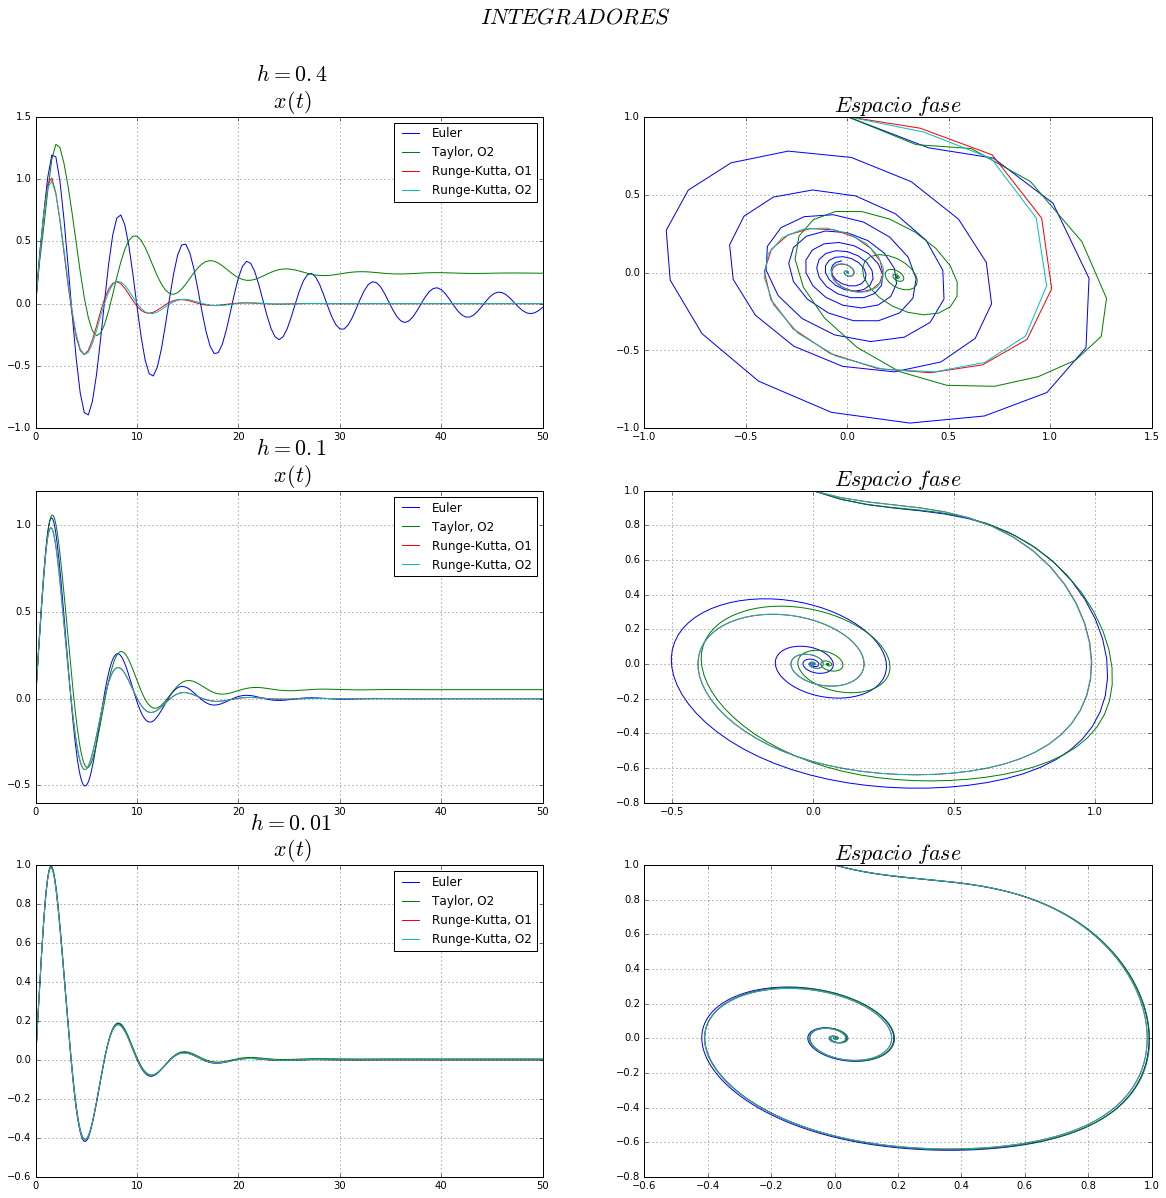

In [9]:
fig = plt.figure(figsize=(20,19))
fig.suptitle("$INTEGRADORES\ $",fontsize=22)
c = 0
for h in pasos:
    c += 2
    ax1 = fig.add_subplot(3,2,c-1)
    ax1.set_title(" $h={}$ \n $x(t)$".format(h),fontsize=22)
    ax2 = fig.add_subplot(3,2,c)
    ax2.set_title("$Espacio\ fase\ $",fontsize=22)
    ax1.grid(True),ax2.grid(True)
    for i in xrange(4):
        t,sol = soluciones[h][i]
        ax1.plot(t,sol[:,0],label=integradores[i])
        ax2.plot(sol[:,0],sol[:,1],label=integradores[i])
        ax1.legend()
plt.show()